### New Dataset 
This updated dataset has been purged of the 1D versions in cases where we had both 1D and 3D reaction results. In other words, there are only 3D results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
data = np.genfromtxt("../../data/newdata/AllChiPurged.dat")

#### Describing Data

In [3]:
# Create dataframe for easier operations/manipulation
df = pd.DataFrame(data, columns = ['ustat','alph1','alph2', 'beta', 'chi'])
df.head()

,ustat,alph1,alph2,beta,chi
0,10.51030,2.34451,2.34451,60.0,3.280780
1,8.40821,2.34451,2.34451,60.0,1.094480
2,7.00684,2.34451,2.34451,60.0,0.840347
3,5.25513,2.34451,2.34451,60.0,0.772829
4,3.50342,2.34451,2.34451,60.0,0.811944


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ustat   344 non-null    float64
 1   alph1   344 non-null    float64
 2   alph2   344 non-null    float64
 3   beta    344 non-null    float64
 4   chi     344 non-null    float64
dtypes: float64(5)
memory usage: 13.6 KB


There are five variables and 344 data entries, all of them are float data types. This is a lot smaller than the previous dataset we worked with. For the problem we want to solve, ustat, alph1, alph2, and beta are features, while chi is our target.

### Understanding Data

#### Variable Distribution
Let's examine the dispersion of the variables through the boxplots and the measures of central tendency and dispersion through the describe() function.

count    344.000000
mean       4.308178
std        3.554860
min        0.159464
25%        1.406402
50%        3.040445
75%        6.683122
max       15.747400
Name: ustat, dtype: float64

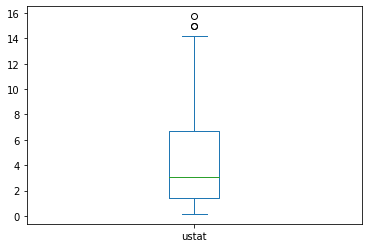

In [5]:
# ustat
# right skewed: more values towards first quartile
df['ustat'].plot.box()
df['ustat'].describe()

count    344.000000
mean       2.212722
std        0.588861
min        1.030200
25%        1.787580
50%        2.228930
75%        2.541760
max        3.509590
Name: alph1, dtype: float64

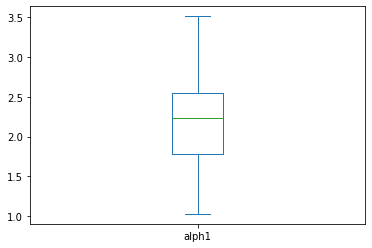

In [6]:
# alph1
# no skew: roughly equal
df['alph1'].plot.box()
df['alph1'].describe()

count    344.000000
mean      11.697200
std       24.239340
min        0.708487
25%        1.855430
50%        2.191920
75%        3.003490
max       95.116800
Name: alph2, dtype: float64

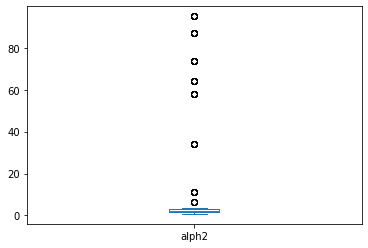

In [7]:
# alph2
# right skewed: more values towards first quartile
# lot of entries considered outliers; large standard deviation
df['alph2'].plot.box()
df['alph2'].describe()

<AxesSubplot:>

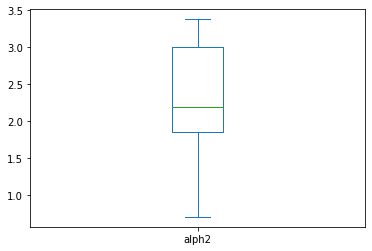

In [8]:
# remove outliers
df['alph2'].plot.box(showfliers=False)

count    344.000000
mean      52.463372
std       20.016199
min       11.600000
25%       46.400000
50%       47.800000
75%       60.000000
max       89.300000
Name: beta, dtype: float64

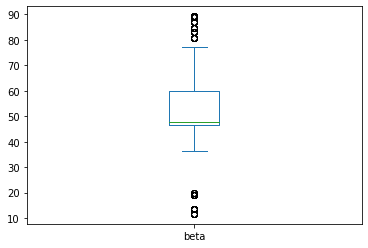

In [9]:
# beta
# right skewed: more values towards first quartile
# lot of entries considered outliers; large standard deviation
df['beta'].plot.box()
df['beta'].describe()

<AxesSubplot:>

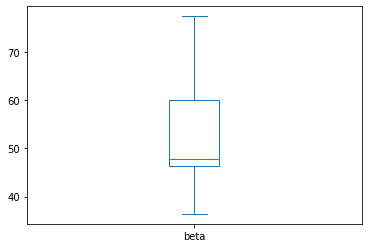

In [10]:
df['beta'].plot.box(showfliers=False)

count    344.000000
mean       1.642423
std        2.853217
min        0.108574
25%        0.675572
50%        0.920765
75%        1.278355
max       25.005300
Name: chi, dtype: float64

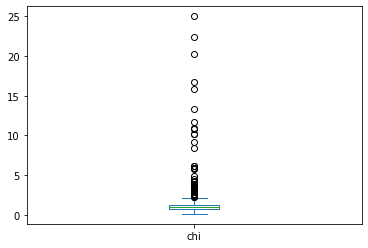

In [11]:
# chi
# no skew
# lot of entries considered outliers; large standard deviation
df['chi'].plot.box()
df['chi'].describe()

<AxesSubplot:>

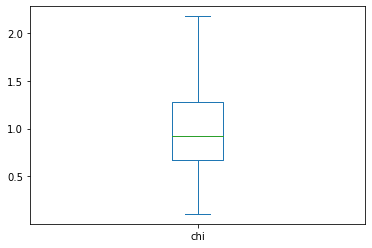

In [12]:
df['chi'].plot.box(showfliers=False)

Similar to the previous dataset, many of the high-valued entries are regarded as outliers. This is due to the distributions being right skewed, majority favoring the first quartile. For chi, a majority of the entries lie below the  third quartile, 1.28.

I wanted to further examine the distribution using histograms. Histogram provides easier visualization for some examples.

<AxesSubplot:xlabel='ustat', ylabel='Count'>

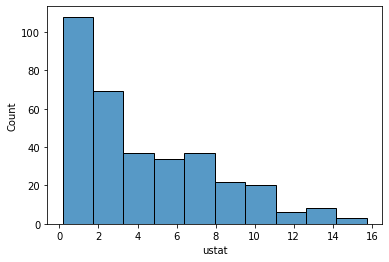

In [13]:
# ustat: right skewed
sns.histplot(data=df, x='ustat', bins=10)

<AxesSubplot:xlabel='alph1', ylabel='Count'>

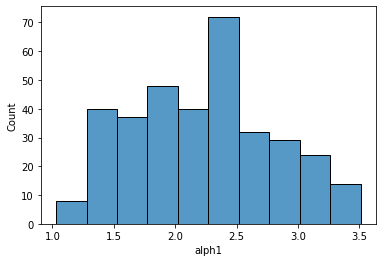

In [14]:
# alph1: no skew
# normal distribution
sns.histplot(data=df, x='alph1', bins=10)

<AxesSubplot:xlabel='alph2', ylabel='Count'>

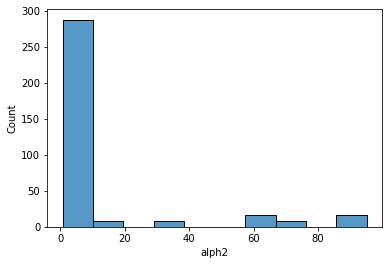

In [15]:
# alph2: right skewed
# majority of entries are in the first bin
sns.histplot(data=df, x='alph2', bins=10)

<AxesSubplot:xlabel='beta', ylabel='Count'>

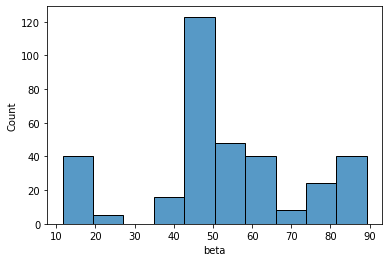

In [16]:
# beta: right skewed
# a large amount of entries are in the fifth bin, which makes the data slightly right skewed
sns.histplot(data=df, x='beta', bins=10)

<AxesSubplot:xlabel='chi', ylabel='Count'>

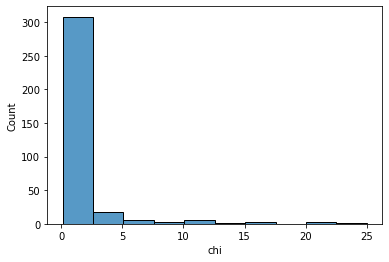

In [17]:
# chi: right skewed
# majority of entries are in the first bin
sns.histplot(data=df, x='chi', bins=10)

#### Possible relationships among variables

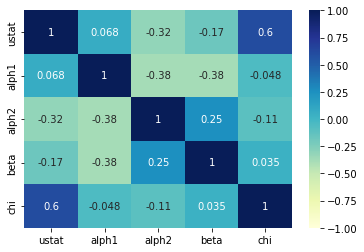

In [18]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

Correlation heatmap. Chi and ustat demonstrate positive correlation. The other relationships are weak. 

array([[<AxesSubplot:xlabel='ustat', ylabel='ustat'>,
        <AxesSubplot:xlabel='alph1', ylabel='ustat'>,
        <AxesSubplot:xlabel='alph2', ylabel='ustat'>,
        <AxesSubplot:xlabel='beta', ylabel='ustat'>,
        <AxesSubplot:xlabel='chi', ylabel='ustat'>],
       [<AxesSubplot:xlabel='ustat', ylabel='alph1'>,
        <AxesSubplot:xlabel='alph1', ylabel='alph1'>,
        <AxesSubplot:xlabel='alph2', ylabel='alph1'>,
        <AxesSubplot:xlabel='beta', ylabel='alph1'>,
        <AxesSubplot:xlabel='chi', ylabel='alph1'>],
       [<AxesSubplot:xlabel='ustat', ylabel='alph2'>,
        <AxesSubplot:xlabel='alph1', ylabel='alph2'>,
        <AxesSubplot:xlabel='alph2', ylabel='alph2'>,
        <AxesSubplot:xlabel='beta', ylabel='alph2'>,
        <AxesSubplot:xlabel='chi', ylabel='alph2'>],
       [<AxesSubplot:xlabel='ustat', ylabel='beta'>,
        <AxesSubplot:xlabel='alph1', ylabel='beta'>,
        <AxesSubplot:xlabel='alph2', ylabel='beta'>,
        <AxesSubplot:xlabel='beta', y

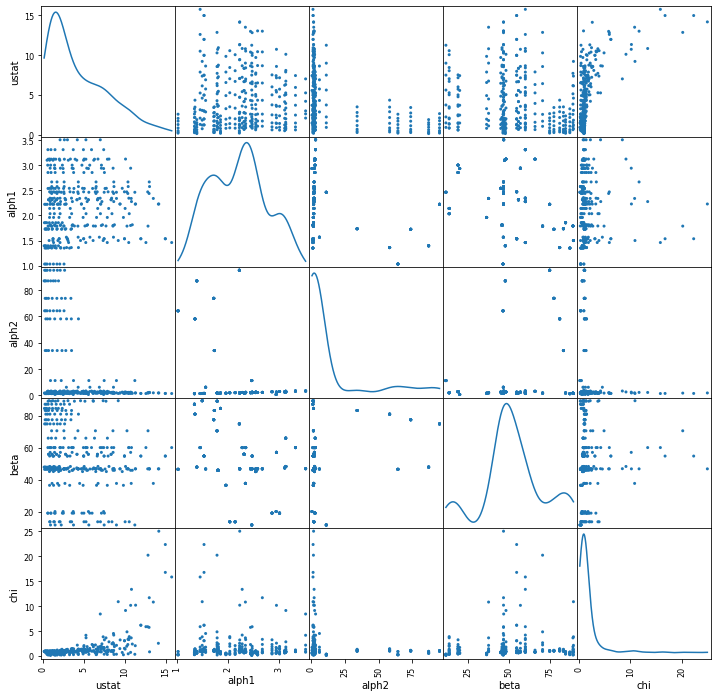

In [19]:
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (12, 12), diagonal = 'kde')

#### Transform Data

In [20]:
#from sklearn.preprocessing import PowerTransformer
#pt = PowerTransformer()    

In [21]:
# transform data
#df = pt.fit_transform(df)
#df = pd.DataFrame(df, columns = ['ustat','alph1','alph2', 'beta', 'chi'])

In [22]:
#pd.plotting.scatter_matrix(df, alpha = 1, figsize = (12, 12), diagonal = 'kde')

#### Three Dimensional Scatter

Three dimensional scatterplots with x and y as features and z as target (chi). The purpose of doing this is to examine target relationships with two features.

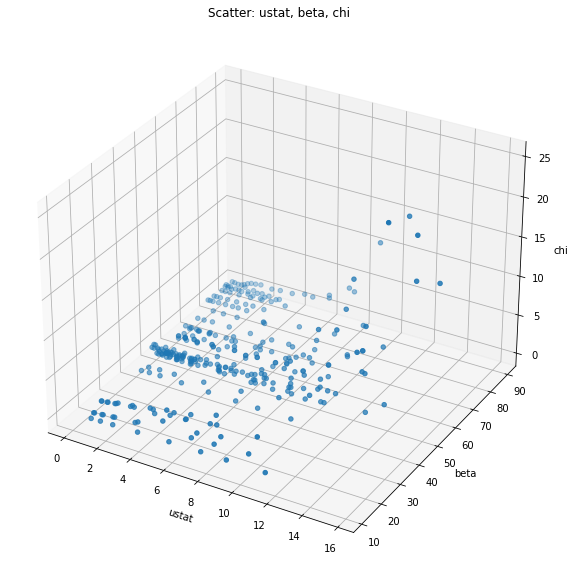

In [23]:
# features
x = df['ustat']
y = df['beta']
# target
z = df['chi']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_title('Scatter: ustat, beta, chi')
ax.set_xlabel('ustat')
ax.set_ylabel('beta')
ax.set_zlabel('chi')
 
plt.show()

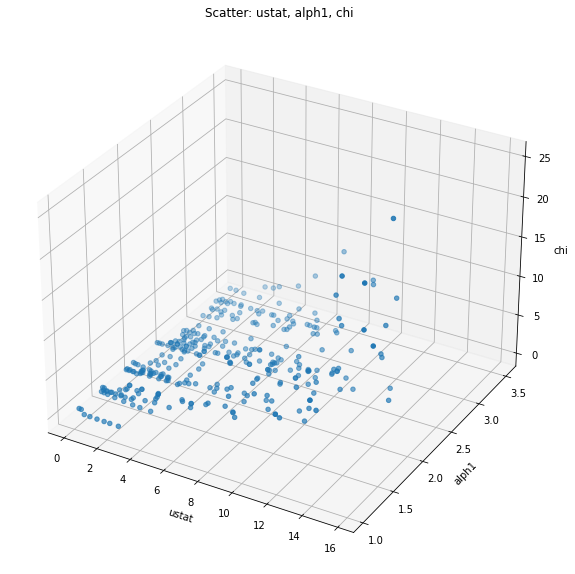

In [24]:
# features
x = df['ustat']
y = df['alph1']
# target
z = df['chi']

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_title('Scatter: ustat, alph1, chi')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('chi')
 
plt.show()

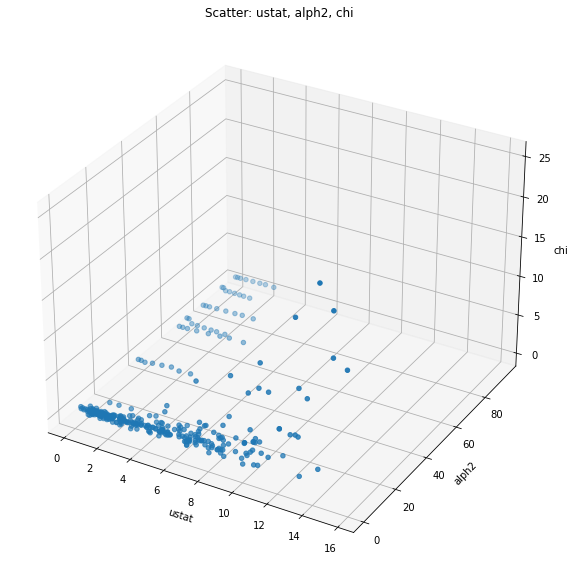

In [25]:
# features
x = df['ustat']
y = df['alph2']
# target
z = df['chi']

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_title('Scatter: ustat, alph2, chi')
ax.set_xlabel('ustat')
ax.set_ylabel('alph2')
ax.set_zlabel('chi')
 
plt.show()

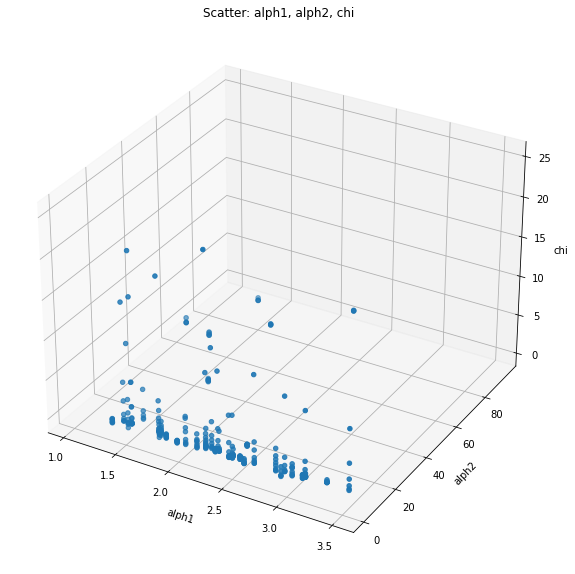

In [26]:
# features
x = df['alph1']
y = df['alph2']
# target
z = df['chi']
    
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_title('Scatter: alph1, alph2, chi')
ax.set_xlabel('alph1')
ax.set_ylabel('alph2')
ax.set_zlabel('chi')
 
plt.show()

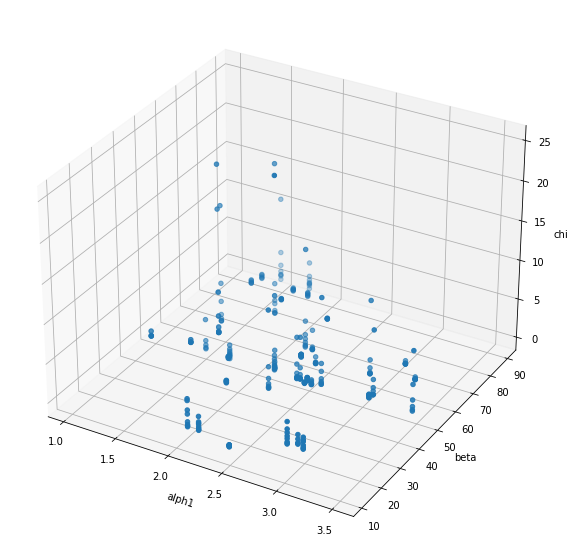

In [27]:
# features
x = df['alph1']
y = df['beta']
# target
z = df['chi']

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_xlabel('alph1')
ax.set_ylabel('beta')
ax.set_zlabel('chi')
 
plt.show()

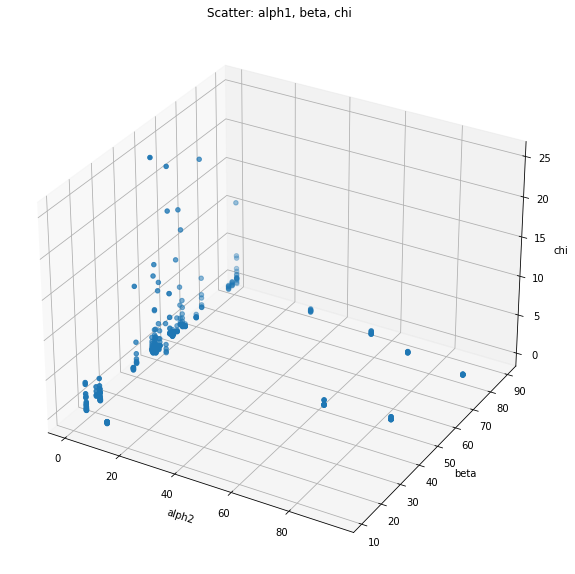

In [28]:
# features
x = df['alph2']
y = df['beta']
# target
z = df['chi']
    
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)
ax.set_title('Scatter: alph1, beta, chi')
ax.set_xlabel('alph2')
ax.set_ylabel('beta')
ax.set_zlabel('chi')
 
plt.show()

#### Three Dimensional Scatter for Features

Three dimensional scatterplots with x, y, and z as features. The purpose of doing this is to see if the scatter can potentially be used for clustering.

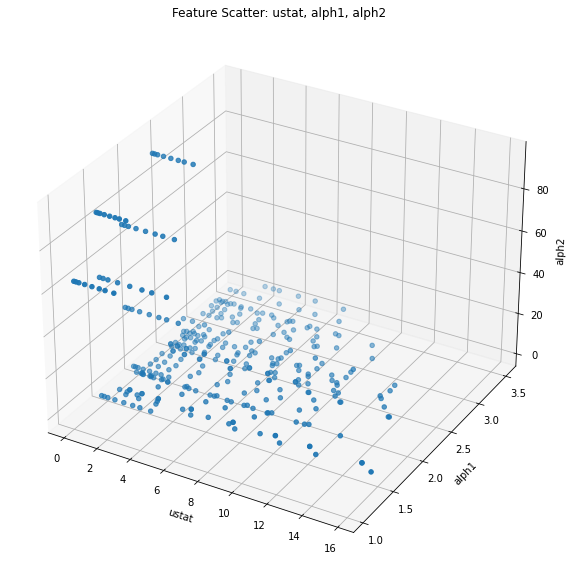

In [29]:
x = df['ustat']
y = df['alph1']
z = df['alph2']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph1, alph2')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('alph2')
 
plt.show()

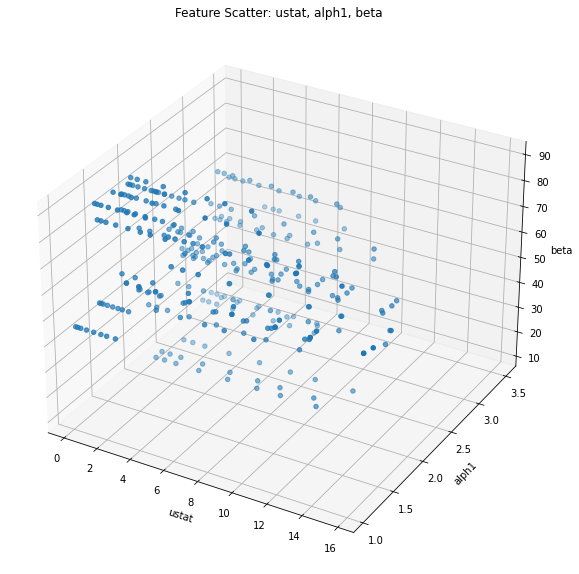

In [30]:
x = df['ustat']
y = df['alph1']
z = df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph1, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph1')
ax.set_zlabel('beta')
 
plt.show()

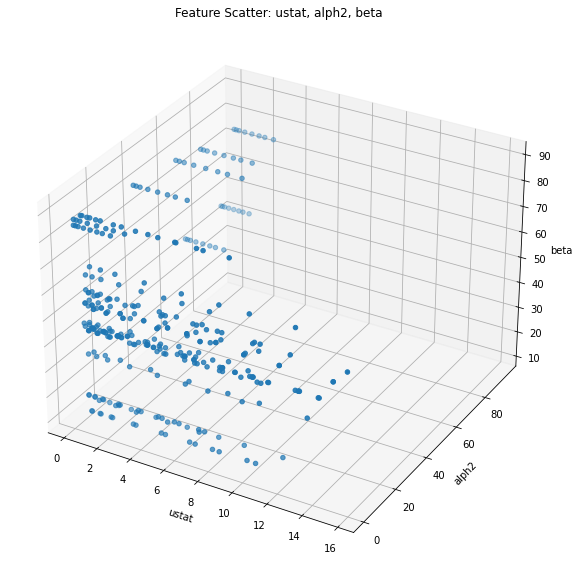

In [31]:
x = df['ustat']
y = df['alph2']
z = df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: ustat, alph2, beta')
ax.set_xlabel('ustat')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')
 
plt.show()

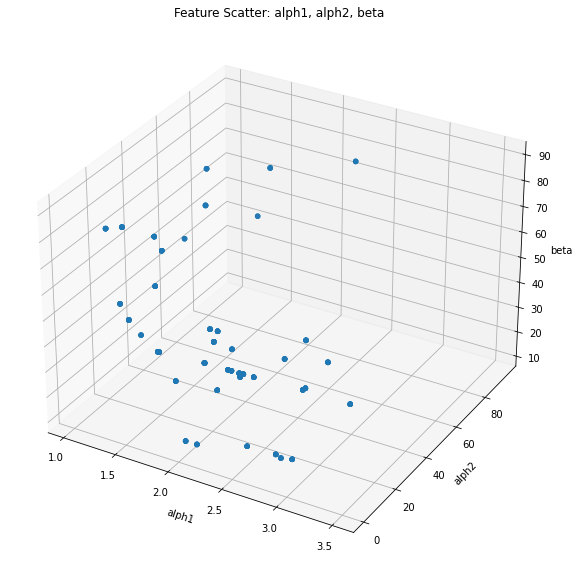

In [32]:
x = df['alph1']
y = df['alph2']
z = df['beta']


fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z)

ax.set_title('Feature Scatter: alph1, alph2, beta')
ax.set_xlabel('alph1')
ax.set_ylabel('alph2')
ax.set_zlabel('beta')
 
plt.show()

The current scatter plots do not look very ideal for running clustering algorithms. Visually, they look imbalanced and improperly scaled. Will look into potential ways to transform data into something more usable.